# Predicting Air temperature

We are using data from years 2011 to 2019 for weather station PTIM4


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime

### Using glob to read multiple files at once. The output is a list of dataframes

In [2]:
filenames = glob('/Users/shrav/Downloads/Ice Cover/PTIM4/ptim4*.txt')
dataframes = [pd.read_csv(f, delim_whitespace = True, header = 0, skiprows = 1, 
                          dtype={'#yr': object, 'mo': object, 'dy': object, 'hr': object, 'mn': object}) 
              for f in filenames]

### Concatenating the list of dataframes to form a single dataframe

In [3]:
df_ice_cover = pd.concat(dataframes, sort = False)

In [4]:
##### Checking the dimensions of the dataframe #########
df_ice_cover.shape

(769386, 18)

In [5]:
############### Displaying the columns #################
df_ice_cover.columns

Index(['#yr', 'mo', 'dy', 'hr', 'mn', 'degT', 'm/s', 'm/s.1', 'm', 'sec',
       'sec.1', 'degT.1', 'hPa', 'degC', 'degC.1', 'degC.2', 'mi', 'ft'],
      dtype='object')

In [6]:
columns = ["YYYY","MM","DD","hh","mm","WDIR","WSPD","GST","WVHT","DPD","APD","MWD","BAR","ATMP","WTMP","DEWP","VIS","TIDE"]

In [7]:
############## Assigning new column names ##############
df_ice_cover.columns = columns

In [8]:
########### Checking the datatypes of features #########
df_ice_cover.dtypes

YYYY     object
MM       object
DD       object
hh       object
mm       object
WDIR      int64
WSPD    float64
GST     float64
WVHT    float64
DPD     float64
APD     float64
MWD       int64
BAR     float64
ATMP    float64
WTMP    float64
DEWP    float64
VIS     float64
TIDE    float64
dtype: object

### Converting Year, Month, Day, Hour and Minutes columns into DateTime feature

In [9]:
df_ice_cover["dateTime"] = df_ice_cover["YYYY"].astype(str) + df_ice_cover["MM"].astype(str) + df_ice_cover["DD"].astype(str) + df_ice_cover["hh"].astype(str) + df_ice_cover["mm"].astype(str)

# convert the datetime to a list
dfList = df_ice_cover['dateTime'].tolist()
# create a new empty list to hold true datetime values
dateList = []
# run datetime function
for d in dfList:
    dates = datetime.strptime(d, '%Y%m%d%H%M')
    dateList.append(dates)

#a = ["YYYYMMDDhhmm"]
#dateListnew = a + dateList
# add the list as a new column to the dataframe
df_ice_cover["DateTime"] = dateList

### Checking the head

In [10]:
df_ice_cover.head()

,YYYY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE,dateTime,DateTime
0,2011,01,01,00,00,311,1.6,2.0,99.0,99.0,99.0,999,1007.6,3.3,999.0,999.0,99.0,99.0,201101010000,2011-01-01 00:00:00
1,2011,01,01,00,06,266,1.2,1.7,99.0,99.0,99.0,999,1007.9,3.1,999.0,999.0,99.0,99.0,201101010006,2011-01-01 00:06:00
2,2011,01,01,00,12,242,1.5,2.0,99.0,99.0,99.0,999,1008.0,3.1,999.0,999.0,99.0,99.0,201101010012,2011-01-01 00:12:00
3,2011,01,01,00,18,265,1.6,2.4,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,201101010018,2011-01-01 00:18:00
4,2011,01,01,00,24,272,1.8,2.7,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,201101010024,2011-01-01 00:24:00


In [11]:
df_ice_cover = df_ice_cover.drop(['YYYY', 'MM', 'DD', 'hh', 'mm', 'dateTime'], axis = 1)
df_ice_cover.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE,DateTime
0,311,1.6,2.0,99.0,99.0,99.0,999,1007.6,3.3,999.0,999.0,99.0,99.0,2011-01-01 00:00:00
1,266,1.2,1.7,99.0,99.0,99.0,999,1007.9,3.1,999.0,999.0,99.0,99.0,2011-01-01 00:06:00
2,242,1.5,2.0,99.0,99.0,99.0,999,1008.0,3.1,999.0,999.0,99.0,99.0,2011-01-01 00:12:00
3,265,1.6,2.4,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,2011-01-01 00:18:00
4,272,1.8,2.7,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,2011-01-01 00:24:00


In [12]:
############ Analyzing the distribution of Air Temperature ##############
df_ice_cover['ATMP'].describe()

count    769386.000000
mean         46.339769
std         198.289327
min         -33.000000
25%          -1.700000
50%           6.000000
75%          15.100000
max         999.000000
Name: ATMP, dtype: float64

### The objective is to predict ATMP. The value 999.0 is akin to a missing value. We are replacing it with NANs

In [13]:
df_ice_cover = df_ice_cover.replace(df_ice_cover['ATMP'].max(), np.nan)

In [14]:
df_ice_cover['ATMP'].max()

32.6

In [15]:
############ Checking the number of missing values in ATMP ##############
df_ice_cover['ATMP'].isna().sum()

31862

### Plotting the Air temperatures across all years

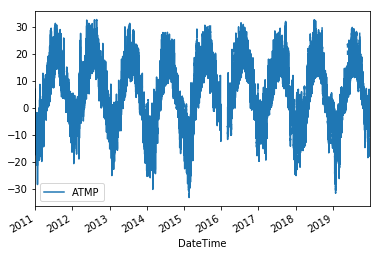

In [16]:
%matplotlib inline
df_ice_cover.plot(x = 'DateTime', y='ATMP')

In [17]:
df_ice_cover = df_ice_cover.set_index(['DateTime'])

### Interpolating ATMP to eliminate missing values

In [18]:
#df_ice_cover['ATMP'] = df_ice_cover['ATMP'].interpolate(inplace=False)

In [19]:
df_ice_cover.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE
DateTime,,,,,,,,,,,,,
2011-01-01 00:00:00,311.0,1.6,2.0,99.0,99.0,99.0,NaN,1007.6,3.3,NaN,NaN,99.0,99.0
2011-01-01 00:06:00,266.0,1.2,1.7,99.0,99.0,99.0,NaN,1007.9,3.1,NaN,NaN,99.0,99.0
2011-01-01 00:12:00,242.0,1.5,2.0,99.0,99.0,99.0,NaN,1008.0,3.1,NaN,NaN,99.0,99.0
2011-01-01 00:18:00,265.0,1.6,2.4,99.0,99.0,99.0,NaN,1008.2,3.2,NaN,NaN,99.0,99.0
2011-01-01 00:24:00,272.0,1.8,2.7,99.0,99.0,99.0,NaN,1008.2,3.2,NaN,NaN,99.0,99.0


### Analysing the number of missing values in each column

In [20]:
df_ice_cover.isna().sum()

WDIR     18268
WSPD         0
GST          0
WVHT         0
DPD          0
APD          0
MWD     769386
BAR        618
ATMP     31862
WTMP    769386
DEWP    335162
VIS          0
TIDE         0
dtype: int64

### Dropping columns where more than 30% are missing values

In [21]:
df_ice_cover = df_ice_cover.drop(['MWD', 'WTMP', 'DEWP'], axis = 1)

In [22]:
df_ice_cover.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,BAR,ATMP,VIS,TIDE
DateTime,,,,,,,,,,
2011-01-01 00:00:00,311.0,1.6,2.0,99.0,99.0,99.0,1007.6,3.3,99.0,99.0
2011-01-01 00:06:00,266.0,1.2,1.7,99.0,99.0,99.0,1007.9,3.1,99.0,99.0
2011-01-01 00:12:00,242.0,1.5,2.0,99.0,99.0,99.0,1008.0,3.1,99.0,99.0
2011-01-01 00:18:00,265.0,1.6,2.4,99.0,99.0,99.0,1008.2,3.2,99.0,99.0
2011-01-01 00:24:00,272.0,1.8,2.7,99.0,99.0,99.0,1008.2,3.2,99.0,99.0


In [23]:
df_ice_cover = df_ice_cover.apply(lambda x: x.replace(99.0, np.nan))

In [24]:
df_ice_cover = df_ice_cover.apply(lambda x: x.replace(9999.0, np.nan))

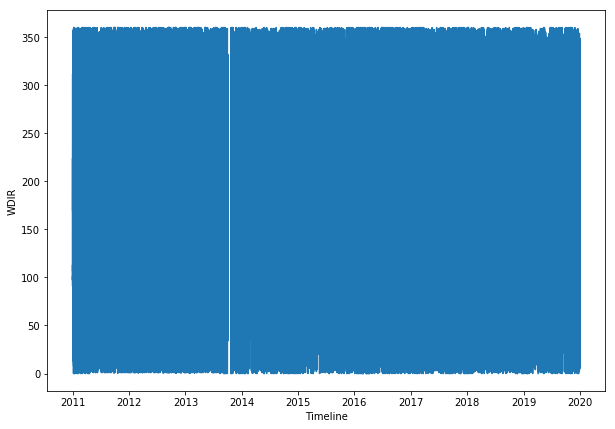

In [25]:
%matplotlib inline
#df_ice_cover['WDIR'].plot()

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_ice_cover['WDIR'])
ax.set_xlabel('Timeline')
ax.set_ylabel('WDIR')

plt.show()

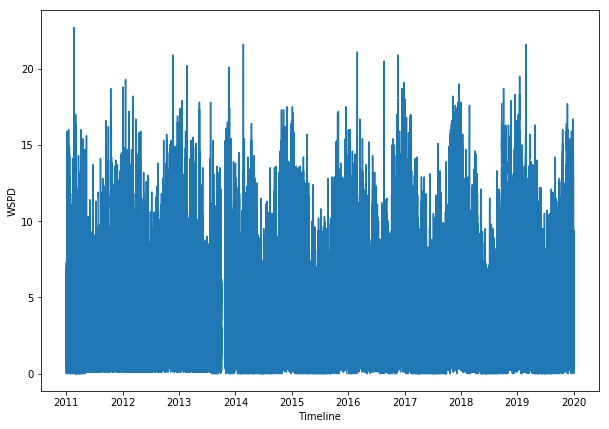

In [26]:
%matplotlib inline
#df_ice_cover['WDIR'].plot()

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_ice_cover['WSPD'])
ax.set_xlabel('Timeline')
ax.set_ylabel('WSPD')

plt.show()

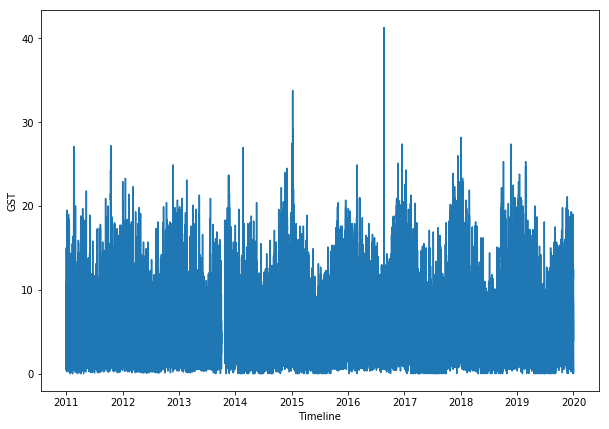

In [27]:
%matplotlib inline
#df_ice_cover['WDIR'].plot()

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_ice_cover['GST'])
ax.set_xlabel('Timeline')
ax.set_ylabel('GST')

plt.show()

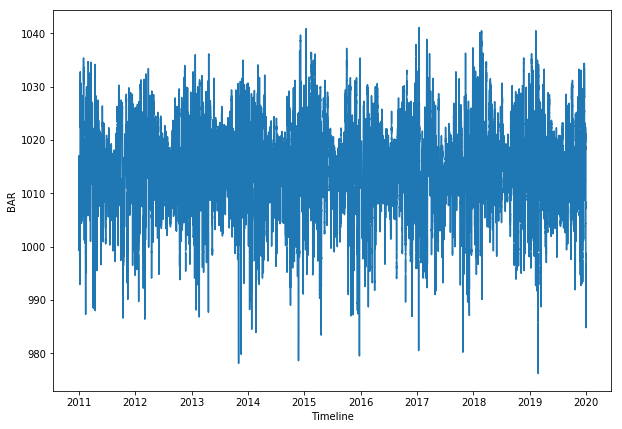

In [28]:
%matplotlib inline
#df_ice_cover['WDIR'].plot()

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_ice_cover['BAR'])
ax.set_xlabel('Timeline')
ax.set_ylabel('BAR')

plt.show()

In [29]:
df_ice_cover = df_ice_cover.drop(['WVHT', 'DPD', 'APD', 'VIS', 'TIDE'], axis = 1)
df_ice_cover.head()

,WDIR,WSPD,GST,BAR,ATMP
DateTime,,,,,
2011-01-01 00:00:00,311.0,1.6,2.0,1007.6,3.3
2011-01-01 00:06:00,266.0,1.2,1.7,1007.9,3.1
2011-01-01 00:12:00,242.0,1.5,2.0,1008.0,3.1
2011-01-01 00:18:00,265.0,1.6,2.4,1008.2,3.2
2011-01-01 00:24:00,272.0,1.8,2.7,1008.2,3.2


In [30]:
df_ice_cover.isna().sum()

WDIR    21072
WSPD    18472
GST     18378
BAR     10144
ATMP    31862
dtype: int64

In [31]:
df_ice_cover.corr()

,WDIR,WSPD,GST,BAR,ATMP
WDIR,1.000000,0.194719,0.205940,-0.064884,-0.005075
WSPD,0.194719,1.000000,0.953135,-0.119794,-0.207058
GST,0.205940,0.953135,1.000000,-0.161222,-0.190645
BAR,-0.064884,-0.119794,-0.161222,1.000000,-0.177939
ATMP,-0.005075,-0.207058,-0.190645,-0.177939,1.000000


In [32]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=7)
#df_filled = imputer.fit_transform(df_ice_cover)

### Modelling Routine

### Creating Training and Validation Data sets

In [33]:
X = df_ice_cover.drop(['ATMP'], axis = 1)
Y = df_ice_cover['ATMP']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(615508, 4) (615508,)
(153878, 4) (153878,)


### Training XGBoost Model

In [35]:
from xgboost import XGBRegressor as XGB

# fit model no training data
model = XGB(n_estimators = 200, max_depth = 3, learning_rate = 0.3, objective = 'reg:squarederror', 
            njobs = -1, verbose = True)
model.fit(X_train, y_train)

C:\Users\shrav\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, njobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbose=True, verbosity=1)

### Using the trained model to predict on training data

In [36]:
y_train_pred = model.predict(X_train)
y_train_pred

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32)

### Predicting on test data

In [37]:
y_test_pred = model.predict(X_test)
y_test_pred

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32)

### Using Root Mean Squared Error to evaluate the model on training data

In [38]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train, y_train_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Evaluating the model on test data

In [ ]:
math.sqrt(mean_squared_error(y_test, y_test_pred))